# About

About Dataset
Concerns housing values in suburbs of Boston.

Number of Instances: 506
Number of Attributes: 13 continuous attributes (including "class"
attribute "MEDV"), 1 binary-valued attribute.
Attribute Information:

    CRIM per capita crime rate by town

    ZN -proportion of residential land zoned for lots over 25,000 sq.ft.

    INDUS -proportion of non-retail business acres per town

    CHAS -Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

    NOX -nitric oxides concentration (parts per 10 million)

    RM -average number of rooms per dwelling

    AGE -proportion of owner-occupied units built prior to 1940

    DIS -weighted distances to five Boston employment centres
    
    RAD -index of accessibility to radial highways
    
    TAX -full-value property-tax rate per 10,000 dollars
    
    PTRATIO - pupil-teacher ratio by town 
    
    B -1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    
    LSTAT -% lower status of the population
    
    MEDV -Median value of owner-occupied homes in 1000's dollars
    
Missing Attribute Values: None.

# Overall description

In [273]:
import pandas as pd

<IPython.core.display.Javascript object>

In [274]:
from numpy import *

<IPython.core.display.Javascript object>

In [275]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [276]:
data = pd.read_csv("data.csv")
data1 = pd.read_csv("data.csv")

<IPython.core.display.Javascript object>

In [277]:
def round1(x=1):
    if round(x) % 2:
        return round(x)
    else:
        return 1 + round(x) if 1 + round(x) - x < x - round(x) + 1 else round(x) - 1

<IPython.core.display.Javascript object>

In [278]:
def round2(x=0):
    if round(x) % 2:
        return 1 + round(x) if 1 + round(x) - x < x - round(x) + 1 else round(x) - 1
    else:
        return round(x)

<IPython.core.display.Javascript object>

In [279]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<IPython.core.display.Javascript object>

In [280]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


<IPython.core.display.Javascript object>

In [281]:
meanRM = 7

<IPython.core.display.Javascript object>

Modify some values for further plotting:

In [282]:
print(
    "before rounding: \n",
    data[["DIS", "B", "RM", "NOX", "PTRATIO", "AGE", "RAD"]],
    "\n\n",
    sep="\n",
)
for index, row in data.iterrows():
    data.at[index, "DIS"] = round1(row["DIS"])
    data.at[index, "B"] = 100 * round(row["B"] / 100)
    data.at[index, "RM"] = round(row["RM"]) if not isnan(row["RM"]) else meanRM
    data.at[index, "NOX"] = round2(10 * row["NOX"]) / 10
    data.at[index, "PTRATIO"] = round1(row["PTRATIO"])
    data.at[index, "AGE"] = 10 * round1(row["AGE"] / 10)
    data.at[index, "RAD"] = round1(row["RAD"])
for index, row in data1.iterrows():
    data1.at[index, "RM"] = row["RM"] if not isnan(row["RM"]) else meanRM
print(
    "after rounding: \n",
    data[["DIS", "B", "RM", "NOX", "PTRATIO", "AGE", "RAD"]],
    sep="\n",
)

before rounding: 

        DIS       B     RM    NOX  PTRATIO   AGE  RAD
0    4.0900  396.90  6.575  0.538     15.3  65.2    1
1    4.9671  396.90  6.421  0.469     17.8  78.9    2
2    4.9671  392.83  7.185  0.469     17.8  61.1    2
3    6.0622  394.63  6.998  0.458     18.7  45.8    3
4    6.0622  396.90  7.147  0.458     18.7  54.2    3
..      ...     ...    ...    ...      ...   ...  ...
506  2.0980  396.00  6.980  0.561     23.0  89.0    3
507  2.6540  343.00  6.980  0.561     23.0  76.0    3
508  2.9870  343.00  6.123  0.561     23.0  98.0    3
509  2.5430  343.00  6.222  0.561     23.0  34.0    3
510  2.9870  321.00  6.760  0.561     23.0  67.0    3

[511 rows x 7 columns]



after rounding: 

     DIS      B   RM  NOX  PTRATIO   AGE  RAD
0    5.0  400.0  7.0  0.6     15.0  70.0    1
1    5.0  400.0  6.0  0.4     17.0  70.0    1
2    5.0  400.0  7.0  0.4     17.0  70.0    1
3    7.0  400.0  7.0  0.4     19.0  50.0    3
4    7.0  400.0  7.0  0.4     19.0  50.0    3
..   ...    

<IPython.core.display.Javascript object>

In [283]:
data["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
506    12.0
507    32.0
508    54.0
509    67.0
510    24.0
Name: MEDV, Length: 511, dtype: float64

<IPython.core.display.Javascript object>

In [284]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.548728,6.277886,66.555773,3.755382,8.866928,407.440313,18.686888,363.405088,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.131184,0.731021,26.757376,2.247623,8.472210,167.903532,2.398489,96.260219,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.400000,4.000000,10.000000,1.000000,1.000000,187.000000,13.000000,0.000000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.400000,6.000000,50.000000,3.000000,3.000000,279.500000,17.000000,400.000000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.600000,6.000000,70.000000,3.000000,5.000000,330.000000,19.000000,400.000000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.600000,7.000000,90.000000,5.000000,23.000000,666.000000,21.000000,400.000000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.800000,9.000000,90.000000,13.000000,23.000000,711.000000,23.000000,400.000000,76.000000,67.000000


<IPython.core.display.Javascript object>

# Graphical analysis of data

In [285]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [286]:
import seaborn as sns

<IPython.core.display.Javascript object>

In [287]:
import plotly.express as px

<IPython.core.display.Javascript object>

#### all plots to visualize data and formulate hypothesis:

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

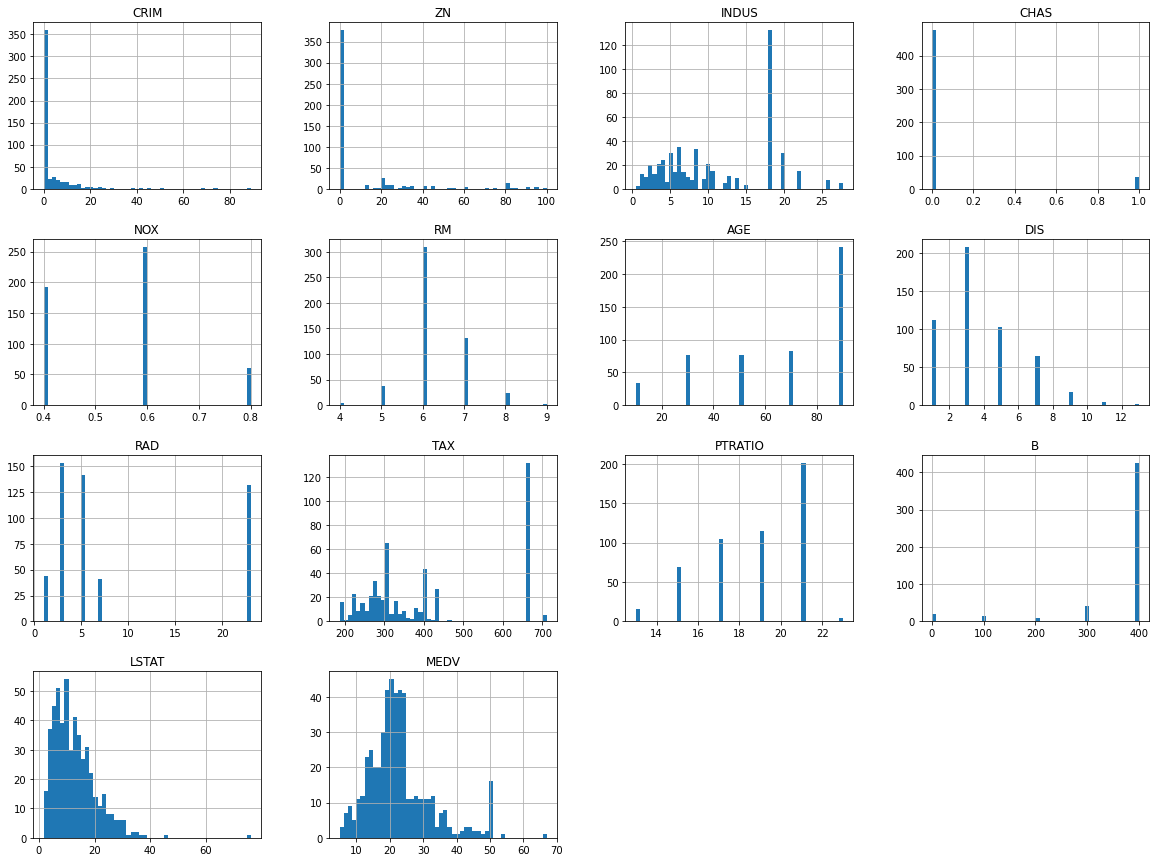

<IPython.core.display.Javascript object>

In [288]:
data.hist(bins=50, figsize=(20, 15))

#### pairwise plots for more precise overview:

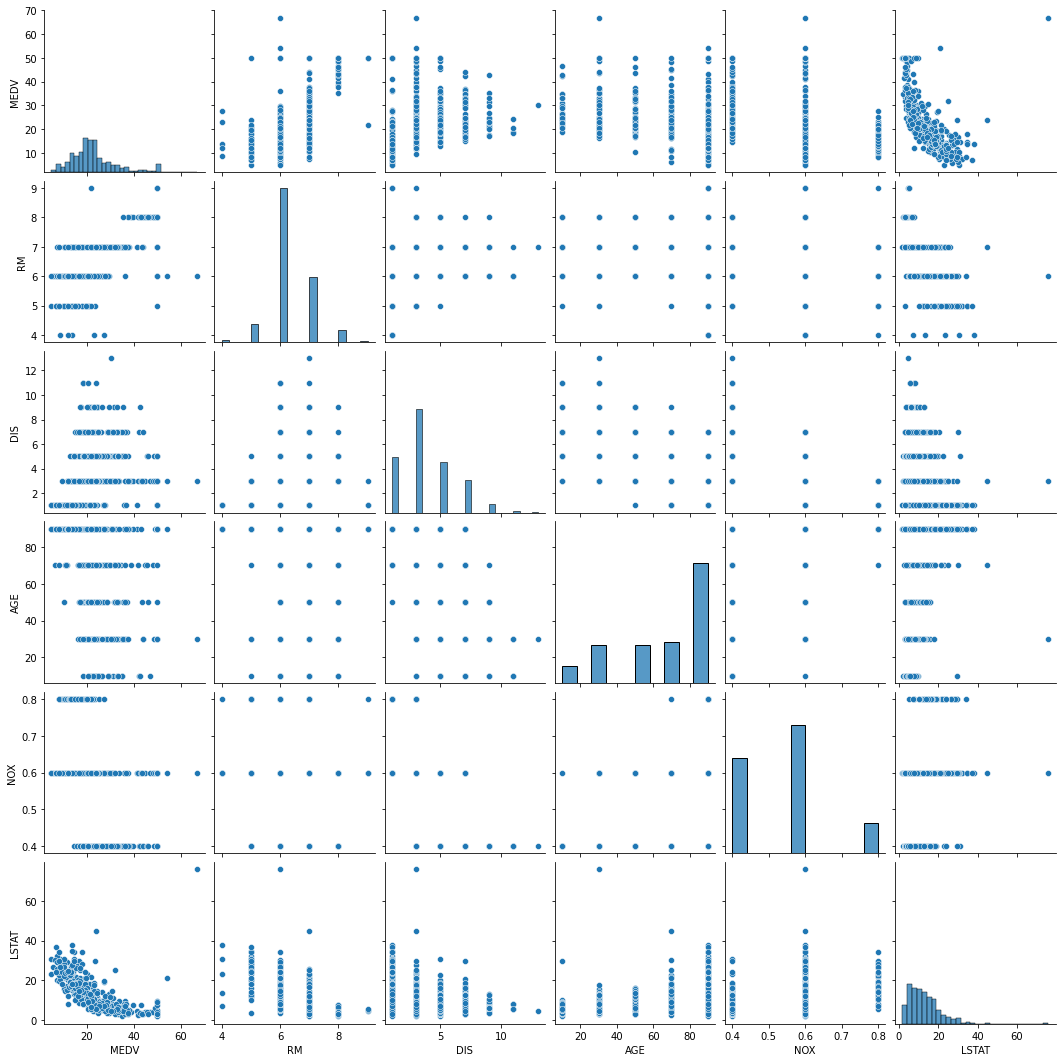

<IPython.core.display.Javascript object>

In [289]:
sns.pairplot(data[["MEDV", "RM", "DIS", "AGE", "NOX", "LSTAT"]])

#### below graph describes the distribution structure of the median house value of 1,000 USD from their distance to the city center
#### the graph also shows that most of the closest to the center houses are rather extremely low priced or  high priced, so that the average house is located much further than an expensive

In [290]:
px.histogram(data[["MEDV", "DIS"]], x="MEDV", color="DIS", marginal="rug")

<IPython.core.display.Javascript object>

#### below graph shows that in average the more house is expensive, the more rooms it has

In [291]:
px.histogram(data[["MEDV", "RM"]], x="MEDV", color="RM", marginal="rug")

<IPython.core.display.Javascript object>

#### below graph shows dependancy of price and average nitric oxides concentration

In [292]:
px.histogram(data[["MEDV", "NOX"]], x="MEDV", color="NOX", marginal="rug")

<IPython.core.display.Javascript object>

#### below graph shows dependacy of price and pupil rate in town

In [293]:
px.histogram(data[["MEDV", "PTRATIO"]], x="MEDV", color="PTRATIO", marginal="rug")

<IPython.core.display.Javascript object>

In [294]:
px.histogram(data[["MEDV", "AGE"]], x="MEDV", color="AGE", marginal="rug")

<IPython.core.display.Javascript object>

#### below graph shows dependancy of price and railway accessibility

In [295]:
px.histogram(data[["MEDV", "RAD"]], x="MEDV", color="RAD", marginal="rug")

<IPython.core.display.Javascript object>

#### below graph shows dependancy of age of house on number of rooms in it

In [296]:
px.histogram(data[["AGE", "RM"]], x="RM", color="AGE")

<IPython.core.display.Javascript object>

# Linear regression

In [297]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

In [309]:
def plot_linear_regression(x, y, data, type="lowess", ttle=""):
    x_train, x_test, y_train, y_test = train_test_split(
        data[[x]], data[y], test_size=0.3, random_state=100
    )
    # splitting the dataset for training and testing
    slr = LinearRegression()
    slr.fit(x_train, y_train)
    # fitting the model
    # print("Intercept: ", slr.intercept_)
    # print("Coefficient: ", slr.coef_)
    y_pred_slr = slr.predict(x_test)
    # print(y_pred_slr)
    # prediction
    df = pd.concat(
        [
            x_test,
            y_test,
            pd.DataFrame(data=map(lambda x: [x], y_pred_slr), columns=["y_pred"]),
        ],
        axis=1,
        join="inner",
    )
    return px.scatter(
        df, x=x, y=y, trendline="lowess", trendline_color_override="Red", title=ttle
    ).show()

<IPython.core.display.Javascript object>

In [311]:
plot_linear_regression("MEDV", "DIS", data1, "lowess", "DIS over MEDV")

<IPython.core.display.Javascript object>

In [300]:
data1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.98765,0.0,12.50,0,0.561,6.980,89.0,2.0980,3,320,23.0,396.00,12.00,12.0
507,0.23456,0.0,12.50,0,0.561,6.980,76.0,2.6540,3,320,23.0,343.00,25.00,32.0
508,0.44433,0.0,12.50,0,0.561,6.123,98.0,2.9870,3,320,23.0,343.00,21.00,54.0
509,0.77763,0.0,12.70,0,0.561,6.222,34.0,2.5430,3,329,23.0,343.00,76.00,67.0


<IPython.core.display.Javascript object>